# Heart Disease Dataset Cleanup
##### _Notebook 1 of 2 of the End-to-end ML Workflow_

This heart disease dataset is a public health dataset that can be retrieved from [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset).

## 1. Problem Definition
_What problem are we trying to solve?_

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

The objective of this model creation is to classify if our incoming patients have heart disease based on the same set of tests.

* __Type of Machine Learning__: _Supervised Learning_
* __Type of Learning__: _Classification_

## 2. Data
_What data do we have?_

### 2.1 Importing the Data
The first step of our process would be to import/read our data from the csv file.

In [1]:
# Importing the data
import numpy as np
import pandas as pd
import seaborn as sbn
from matplotlib import pyplot as plt
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 2.2 Describing our Data
It is very important to have knowledge on what our data looks like and what it represents. Furthermore, it would also be important for our analysis that we get to categorize the different variables of our data so we can check the data accuracy. We will also be showing how to filter and sort our data in this section.

* __Type of Data __
    * Based on Structure: 
        * _Structured_
        * Unstructured
    * Based on Frequency: 
        * _Static_
        * Streaming

In [2]:
# Describing the data
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
#Count the number of unique values
heart_disease.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [4]:
# Filtering our data
# Patients below 30
patients_below_30 = heart_disease[heart_disease.age < 30]
patients_below_30

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


In [5]:
# Patients with Typical Angina
patients_with_cp_typical_angina = heart_disease[heart_disease.cp == 3]
patients_with_cp_typical_angina.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [6]:
# Sorted according to age
typ_ang_df = patients_with_cp_typical_angina.sort_values(by="age", ascending=True)
typ_ang_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


## 3. Success Criteria
_What defines accuracy?_

We calculate accuracy by dividing the number of correct predictions (the corresponding diagonal in the matrix) by the total number of samples.

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_actual    = [1,1,1,1,0,0,0,0,0,0]
y_predicted = [1,1,1,0,1,1,1,1,0,0]

In [8]:
confusion_matrix(y_actual, y_predicted)

array([[2, 4],
       [1, 3]], dtype=int64)

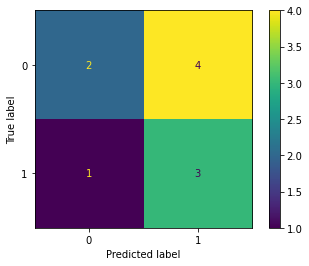

In [9]:
cm = confusion_matrix(y_actual, y_predicted)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot();

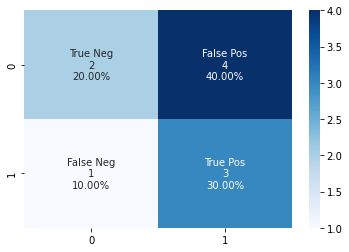

In [10]:
cf_matrix = confusion_matrix(y_actual, y_predicted)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sbn.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

## 4. Features
_What features does our data have and which ones to use?_

The variables types are

1. Binary
    * sex  (Male or Female)
        * 0 = female 
        * 1 = male
    * fbs (Fasting Blood Sugar > 120 mg/dl)
        * 0 = no
        * 1 = yes
    * exang (Exercise Induced Angina)
        * 0 = no
        * 1 = yes
    * target (Heart Disease / Target Field)
        * 0 = disease
        * 1 = no disease
        
2. Categorical
    * cp (Chest Pain Type)
        * 0: asymptomatic
        * 1: atypical angina
        * 2: non-anginal pain
        * 3: typical angina
    * restecg (Resting ECG)
        * 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
        * 1: normal
        * 2: having ST-T wave abnormality
    * slope (the slope of the peak exercise ST segment)
        * 0: downsloping
        * 1: flat
        * 2: upsloping
    * ca (number of major vessels)
        * (0–3)
    * thal (Thalassemia)
        * 1 = normal
        * 2 = fixed defect
        * 3 = reversible defect
3. Continuous
    * age (Age of the individual)
    * trestbps (Resting Blood Pressure in mm/hg) 
    * chol (Serum Cholesterol in mg/dl)
    * thalac (Maximum heart rate achieved)
    * oldpeak (ST depression induced by exercise relative to rest)

### 4.1 Standardizing Column Values
When doing data analysis, we may encounter  data that has a very wide spread.  One way to scale down the values of this data is  process called standardization. Standardization  involves transforming the data such that it will  have a mean of 0 and a standard deviation of 1.

In [11]:
# Since we don't have financial values or largely varied values that can be standardize,
# let us just use the cholesterol field for sample and exercise purposes

In [12]:
new_heart_disease = pd.read_csv("data/heart-disease.csv")

In [13]:
new_heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
new_heart_disease.insert(5,"chol_standardized", 0)

In [15]:
new_heart_disease

,age,sex,cp,trestbps,chol,chol_standardized,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,0,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,0,1,115,1,1.2,1,1,3,0


In [16]:
new_heart_disease.chol_standardized = (new_heart_disease.chol - np.mean(new_heart_disease.chol))/(np.std(new_heart_disease.chol))

In [17]:
new_heart_disease

,age,sex,cp,trestbps,chol,chol_standardized,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,-0.256334,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0.072199,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,-0.816773,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,-0.198357,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,2.082050,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,-0.101730,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0.342756,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,-1.029353,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,-2.227533,0,1,115,1,1.2,1,1,3,0


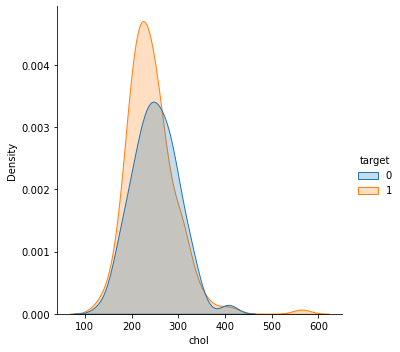

In [18]:
p = sbn.displot(new_heart_disease, x="chol", hue="target", kind="kde", fill=True);

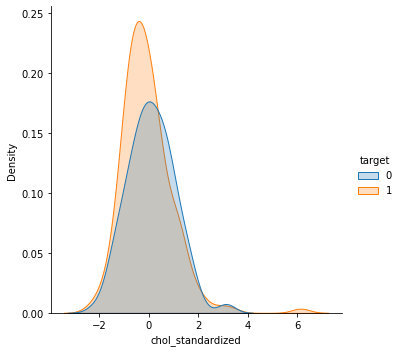

In [19]:
p = sbn.displot(new_heart_disease, x="chol_standardized", hue="target", kind="kde", fill=True);

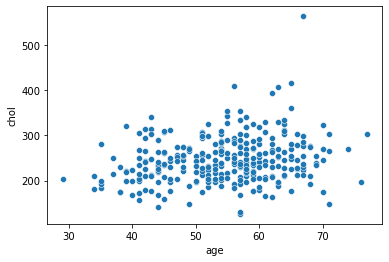

In [20]:
sbn.scatterplot(x="age",
                    y="chol",
                    data=new_heart_disease);

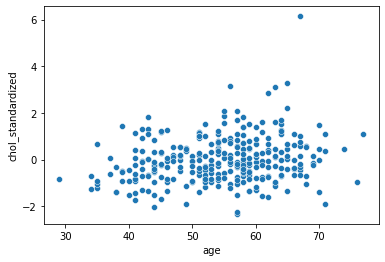

In [21]:
sbn.scatterplot(x="age",
                    y="chol_standardized",
                    data=new_heart_disease);

### 4.2 Merging DataFrames

One of the major problems in handling data is that  data are stored in multiple files. For example, sales data for each year are  saved from different csv files.  In order for our analysis to be more efficient,  we need to store all data in one csv file only.

In [22]:
# Since I only have one dataset, let us just try merging new_heart_disease and heart disease.
heart_disease.shape

(303, 14)

In [23]:
new_heart_disease.shape

(303, 15)

In [24]:
# To merge data frames, they need to have the same columns 
# so let us first do that and then merge two dataframes resulting in 606 elements.

In [25]:
new_heart_disease.drop('chol_standardized', inplace=True, axis=1)

In [26]:
new_heart_disease.shape

(303, 14)

In [27]:
double_heart_disease = pd.concat([heart_disease,new_heart_disease])

In [28]:
double_heart_disease.shape

(606, 14)

### 4.3 Correcting Characteristics and Missing Values
It is best to review our data based on the data definition, we shall make sure that what is in our dataframe, adheres to what is described in the metadata. 
Dealing with missing values is very important  because missing data can cause multiple problems. First, missing data can cause bias in the  estimation of parameters. For example, if the missing data has a large value, the calculated  mean would be less than the actual mean and if the missing data has a small value, the calculated  mean would be larger than the actual mean.
Second, the analysis of the  study can be more complicated. For example, the missing value can be  considered as a categorical variable. Third, it can reduce the  representativeness of the sample. The samples gathered are not enough to  represent the population sample being studied. Fourth, the absence of data reduces  statistical power. This means that there is a lower probability that the test will  reject the null hypothesis when it is false. The result of the study could be wrong.
Each of these distortions  may threaten the validity of the trials and can lead to invalid conclusions.

In [29]:
# Column/feature ‘ca’ ranges from 0–3, however, df.nunique() listed 0–4. So lets find the ‘4’ and change them to NaN.
heart_disease['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [30]:
heart_disease.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [31]:
heart_disease[heart_disease['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [32]:
# 'Int64' (capital I) is a pandas nullable integer, so it can mix with NaNs.
heart_disease = heart_disease.astype({"ca": "Int64"})
heart_disease.loc[heart_disease['ca']==4, 'ca'] = np.NaN 

In [33]:
heart_disease['ca'].unique()

<IntegerArray>
[0, 2, 1, 3, <NA>]
Length: 5, dtype: Int64

In [34]:
heart_disease.ca.value_counts()

0    175
1     65
2     38
3     20
Name: ca, dtype: Int64

In [35]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        298 non-null    Int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: Int64(1), float64(1), int64(12)
memory usage: 33.6 KB


In [36]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [37]:
# Column/feature ‘thal’ ranges from 1–3, however, df.nunique() listed 0–3. There are some values of ‘0’. So lets change them to NaN.
heart_disease['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [38]:
heart_disease.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [39]:
# 'Int64' (capital I) is a pandas nullable integer, so it can mix with NaNs.
heart_disease = heart_disease.astype({"thal": "Int64"})
heart_disease.loc[heart_disease['thal']==0, 'thal'] = np.NaN 

In [40]:
heart_disease['thal'].unique()

<IntegerArray>
[1, 2, 3, <NA>]
Length: 4, dtype: Int64

In [41]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [42]:
# CHeck for missing values ane replace
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [43]:
heart_disease = heart_disease.fillna(heart_disease.median())
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [44]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


### 4.4 Outlier Handling
Sometimes in our processing, we encounter data  that are unusually small or unusually large relative to other data points. These data may  skew our computations toward their direction,  and may possibly lead us to the wrong conclusions. As such, we need measures to mitigate  the adverse effects of these data.

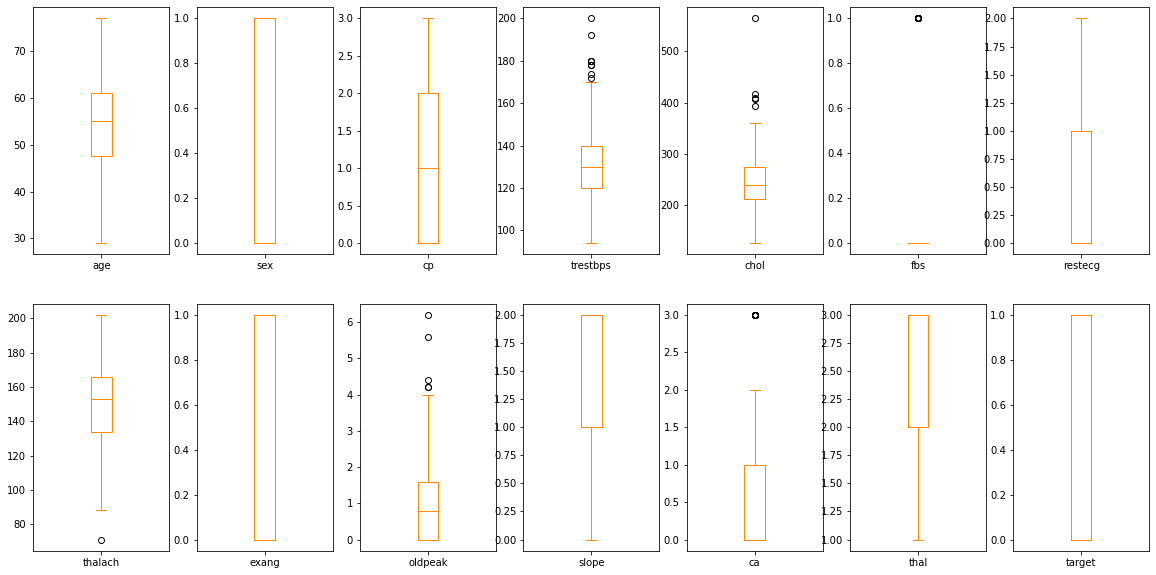

In [45]:
heart_disease.plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='darkorange');

There are more than a few ways of removing outliers, in this one we will be introducing the IQR x 1.5 method but we could also use the three sigma limits method. There are more ways depending on your use-case and how you would define an outlier.

#### Let us recall what our continous features are and put them in a list
* age (Age of the individual)
* trestbps (Resting Blood Pressure in mm/hg)
* chol (Serum Cholesterol in mg/dl)
* thalac (Maximum heart rate achieved)
* oldpeak (ST depression induced by exercise relative to rest)

In [46]:
continous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [47]:
# This function has been adapted to 
# Authored by Aishah Ismail https://www.linkedin.com/in/aishah-ismail/
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            heart_disease.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

In [48]:
outliers(heart_disease[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [49]:
outliers(heart_disease[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


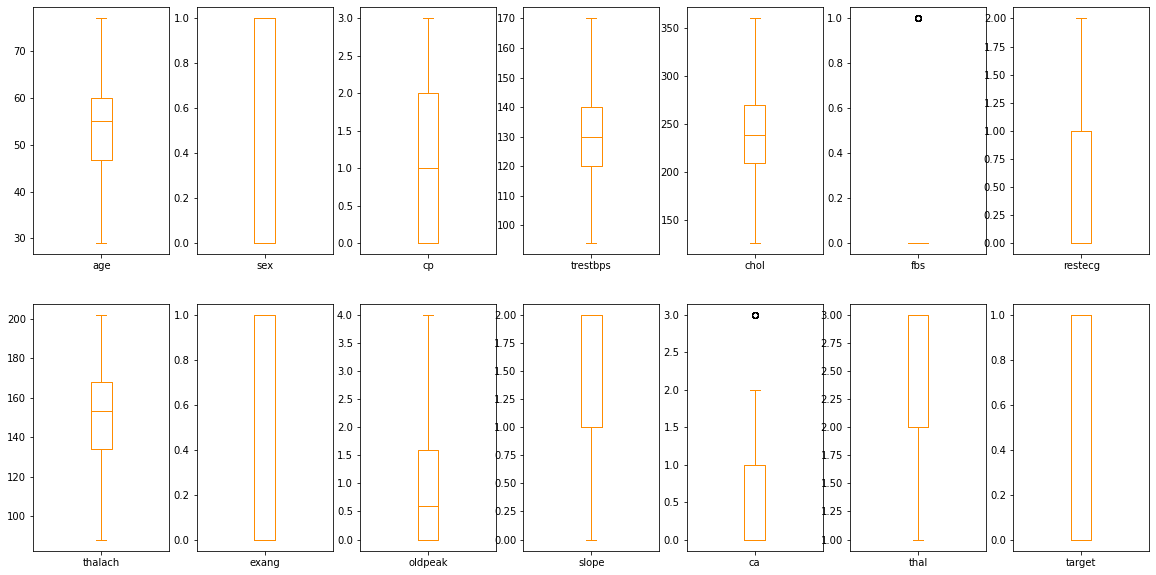

In [50]:
# Note that there are now no outliers in the continuous features
heart_disease.plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='darkorange');

### 4.5 Export our Preprocessed Data

In [51]:
heart_disease.to_csv('data/heart-disease-preprocessed.csv', index=False)